[10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#) \
[Pandas 10분 완성](https://dataitgirls2.github.io/10minutes2pandas/) \
[BSD-3-Clause](https://opensource.org/licenses/BSD-3-Clause)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Object Creation (객체 생성)

In [6]:
# Pandas는 값을 가지고 있는 리스트를 통해 Series를 만들고,
# 정수로 만들어진 인덱스를 기본값으로 불러올 것
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [7]:
# datetime 인덱스와 레이블이 있는 열을 가지고 있는 numpy 배열을 전달하여
# 데이터프레임을 만들 것
dates = pd.date_range('20210101', periods=6)
dates

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2021-01-01,2.068230,0.237707,0.456035,-0.324539
2021-01-02,-0.200638,-0.915049,0.646785,0.344343
2021-01-03,-0.545731,-0.752833,1.139732,0.539390
2021-01-04,-0.718441,-0.401016,-3.187187,-0.623608
2021-01-05,1.141817,0.218365,-2.455401,-1.206758
2021-01-06,-0.404224,0.000422,0.540753,-0.266707


In [9]:
#Series와 같은 것으로 변환될 수 있는 객체들의 dict로 구성된 데이터프레임을 만들 것
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20210102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2021-01-02,1.0,3,test,foo
1,1.0,2021-01-02,1.0,3,train,foo
2,1.0,2021-01-02,1.0,3,test,foo
3,1.0,2021-01-02,1.0,3,train,foo


In [10]:
#데이터프레임 결과물의 열은 다양한 데이터 타입(dtypes)으로 구성됨
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data (데이터 확인)

In [11]:
#데이터 프레임 가장 윗 줄 확인
#기본값=5
df.head()

,A,B,C,D
2021-01-01,2.068230,0.237707,0.456035,-0.324539
2021-01-02,-0.200638,-0.915049,0.646785,0.344343
2021-01-03,-0.545731,-0.752833,1.139732,0.539390
2021-01-04,-0.718441,-0.401016,-3.187187,-0.623608
2021-01-05,1.141817,0.218365,-2.455401,-1.206758


In [12]:
#데이터 프레임 마지막 줄 확인
df.tail(2)

,A,B,C,D
2021-01-05,1.141817,0.218365,-2.455401,-1.206758
2021-01-06,-0.404224,0.000422,0.540753,-0.266707


In [18]:
#인덱스(index), 열(column), numpy 데이터에 대한 세부 정보 확인
df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [19]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [20]:
df.values

array([[ 2.06823047e+00,  2.37707313e-01,  4.56034612e-01,
        -3.24539382e-01],
       [-2.00637998e-01, -9.15049439e-01,  6.46784663e-01,
         3.44343199e-01],
       [-5.45730939e-01, -7.52833465e-01,  1.13973163e+00,
         5.39389816e-01],
       [-7.18441330e-01, -4.01015628e-01, -3.18718724e+00,
        -6.23607844e-01],
       [ 1.14181732e+00,  2.18365201e-01, -2.45540106e+00,
        -1.20675848e+00],
       [-4.04224266e-01,  4.22473410e-04,  5.40753181e-01,
        -2.66706993e-01]])

In [21]:
#데이터의 대략적인 통계적 정보 요약 확인
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.223502,-0.268734,-0.476547,-0.256313
std,1.122429,0.497145,1.846200,0.638270
min,-0.718441,-0.915049,-3.187187,-1.206758
25%,-0.510354,-0.664879,-1.727542,-0.548841
50%,-0.302431,-0.200297,0.498394,-0.295623
75%,0.806203,0.163880,0.620277,0.191581
max,2.068230,0.237707,1.139732,0.539390


In [22]:
#데이터 전치
df.T

,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06
A,2.068230,-0.200638,-0.545731,-0.718441,1.141817,-0.404224
B,0.237707,-0.915049,-0.752833,-0.401016,0.218365,0.000422
C,0.456035,0.646785,1.139732,-3.187187,-2.455401,0.540753
D,-0.324539,0.344343,0.539390,-0.623608,-1.206758,-0.266707


In [23]:
#축 별로 정렬
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2021-01-01,-0.324539,0.456035,0.237707,2.068230
2021-01-02,0.344343,0.646785,-0.915049,-0.200638
2021-01-03,0.539390,1.139732,-0.752833,-0.545731
2021-01-04,-0.623608,-3.187187,-0.401016,-0.718441
2021-01-05,-1.206758,-2.455401,0.218365,1.141817
2021-01-06,-0.266707,0.540753,0.000422,-0.404224


In [24]:
#값 별로 정렬
df.sort_values(by='B')

,A,B,C,D
2021-01-02,-0.200638,-0.915049,0.646785,0.344343
2021-01-03,-0.545731,-0.752833,1.139732,0.539390
2021-01-04,-0.718441,-0.401016,-3.187187,-0.623608
2021-01-06,-0.404224,0.000422,0.540753,-0.266707
2021-01-05,1.141817,0.218365,-2.455401,-1.206758
2021-01-01,2.068230,0.237707,0.456035,-0.324539


## Selection (선택)
    
    - 선택과 설정을 위한 Python / Numpy의 표준화된 표현들이 직관적이며, 코드 작성을 위한 양방향 작업에 유용하지만
    - Pandas에 최적화된 데이터 접근 방법인 .at, .iat, .loc 및 .iloc 을 추천

### Getting (데이터 얻기)

In [25]:
#df.A 와 동일한 Series를 생성하는 단일 열을 선택
df['A']

2021-01-01    2.068230
2021-01-02   -0.200638
2021-01-03   -0.545731
2021-01-04   -0.718441
2021-01-05    1.141817
2021-01-06   -0.404224
Freq: D, Name: A, dtype: float64

In [26]:
#행을 분할하는 [ ]를 통해 선택
df[0:3]

,A,B,C,D
2021-01-01,2.068230,0.237707,0.456035,-0.324539
2021-01-02,-0.200638,-0.915049,0.646785,0.344343
2021-01-03,-0.545731,-0.752833,1.139732,0.539390


In [27]:
df['20210102':'20210104']

,A,B,C,D
2021-01-02,-0.200638,-0.915049,0.646785,0.344343
2021-01-03,-0.545731,-0.752833,1.139732,0.539390
2021-01-04,-0.718441,-0.401016,-3.187187,-0.623608


### Selection by Label (Label 을 통한 선택)

In [28]:
#라벨을 사용하여 횡단면 얻기
df.loc[dates[0]]

A    2.068230
B    0.237707
C    0.456035
D   -0.324539
Name: 2021-01-01 00:00:00, dtype: float64

In [29]:
#라벨을 사용하여 여러 축(의 데이터) 얻기
df.loc[:,['A','B']]

,A,B
2021-01-01,2.068230,0.237707
2021-01-02,-0.200638,-0.915049
2021-01-03,-0.545731,-0.752833
2021-01-04,-0.718441,-0.401016
2021-01-05,1.141817,0.218365
2021-01-06,-0.404224,0.000422


In [30]:
#양쪽 종단점을 포함한 라벨 슬라이싱 확인
df.loc['20210102':'20210104', ['A','B']]

,A,B
2021-01-02,-0.200638,-0.915049
2021-01-03,-0.545731,-0.752833
2021-01-04,-0.718441,-0.401016


In [31]:
#반환되는 객체의 차원 줄이기
df.loc['20210102', ['A','B']]

A   -0.200638
B   -0.915049
Name: 2021-01-02 00:00:00, dtype: float64

In [32]:
#스칼라 값
df.loc[dates[0],'A']

2.0682304725940246

In [34]:
#스칼라 값을 더 빠르게 구하는 방법
df.at[dates[0],'A']

2.0682304725940246

### Selection by Position (위치로 선택하기)

In [35]:
#넘겨받은 정수의 위치를 기준으로 선택
df.iloc[3]

A   -0.718441
B   -0.401016
C   -3.187187
D   -0.623608
Name: 2021-01-04 00:00:00, dtype: float64

In [36]:
#정수로 표기된 슬라이스들을 통해, numpy / python과 유사하게 작동
df.iloc[3:5,0:2]

,A,B
2021-01-04,-0.718441,-0.401016
2021-01-05,1.141817,0.218365


In [37]:
#정수로 표기된 위치값의 리스트들을 통해, numpy / python의 스타일과 유사
df.iloc[[1,2,4],[0,2]]

,A,C
2021-01-02,-0.200638,0.646785
2021-01-03,-0.545731,1.139732
2021-01-05,1.141817,-2.455401


In [38]:
#명시적으로 행 나누기
df.iloc[1:3,:]

,A,B,C,D
2021-01-02,-0.200638,-0.915049,0.646785,0.344343
2021-01-03,-0.545731,-0.752833,1.139732,0.539390


In [39]:
#명시적으로 열 나누기
df.iloc[:,1:3]

,B,C
2021-01-01,0.237707,0.456035
2021-01-02,-0.915049,0.646785
2021-01-03,-0.752833,1.139732
2021-01-04,-0.401016,-3.187187
2021-01-05,0.218365,-2.455401
2021-01-06,0.000422,0.540753


In [40]:
#명시적으로 (특정한) 값을 얻고자 하는 경우
df.iloc[1,1]

-0.9150494394126891

In [41]:
#스칼라 값을 빠르게 얻는 방법(위의 방식과 동일)
df.iat[1,1]

-0.9150494394126891

### Boolean Indexing

In [42]:
#데이터를 선택하기 위해 단일 열의 값을 사용
df[df.A > 0]

,A,B,C,D
2021-01-01,2.068230,0.237707,0.456035,-0.324539
2021-01-05,1.141817,0.218365,-2.455401,-1.206758


In [43]:
#Boolean 조건을 충족하는 데이터프레임에서 값을 선택
df[df > 0]

,A,B,C,D
2021-01-01,2.068230,0.237707,0.456035,NaN
2021-01-02,NaN,NaN,0.646785,0.344343
2021-01-03,NaN,NaN,1.139732,0.539390
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,1.141817,0.218365,NaN,NaN
2021-01-06,NaN,0.000422,0.540753,NaN


In [44]:
#df를 복제한 df2에 E열 추가
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2021-01-01,2.068230,0.237707,0.456035,-0.324539,one
2021-01-02,-0.200638,-0.915049,0.646785,0.344343,one
2021-01-03,-0.545731,-0.752833,1.139732,0.539390,two
2021-01-04,-0.718441,-0.401016,-3.187187,-0.623608,three
2021-01-05,1.141817,0.218365,-2.455401,-1.206758,four
2021-01-06,-0.404224,0.000422,0.540753,-0.266707,three


In [45]:
#필터링을 위한 메소드 isin()을 사용
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2021-01-03,-0.545731,-0.752833,1.139732,0.539390,two
2021-01-05,1.141817,0.218365,-2.455401,-1.206758,four


### Setting (설정)

In [48]:
#새 열을 설정하면 데이터가 인덱스 별로 자동 정렬됨
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20210102', periods=6))
s1

2021-01-02    1
2021-01-03    2
2021-01-04    3
2021-01-05    4
2021-01-06    5
2021-01-07    6
Freq: D, dtype: int64

In [81]:
df['F'] = s1
df

,A,B,C,D,F
2021-01-01,0.338215,-0.960465,0.086288,1.407809,NaN
2021-01-02,-0.847325,0.848492,-0.612760,-0.163944,1.0
2021-01-03,-0.996117,0.102436,-0.734586,-0.497452,2.0
2021-01-04,-0.786360,0.080061,-0.341633,0.082316,3.0
2021-01-05,0.913897,1.033601,-1.217398,-0.629907,4.0
2021-01-06,-0.244832,0.766041,1.203211,-0.938157,5.0


In [51]:
#라벨에 의해 값을 설정
#0:0의 값을 0으로 바꿈
df.at[dates[0],'A']=0

In [55]:
#위치에 의해 값을 설정
#0:1의 값을 0으로 바꿈
df.iat[0,1]=0

In [56]:
#Numpy 배열을 사용한 할당에 의해 값을 설정
df.loc[:,'D']=np.array([5]*len(df))
df

,A,B,C,D,F
2021-01-01,0.000000,0.000000,0.456035,5,NaN
2021-01-02,-0.200638,-0.915049,0.646785,5,1.0
2021-01-03,-0.545731,-0.752833,1.139732,5,2.0
2021-01-04,-0.718441,-0.401016,-3.187187,5,3.0
2021-01-05,1.141817,0.218365,-2.455401,5,4.0
2021-01-06,-0.404224,0.000422,0.540753,5,5.0


In [57]:
#where 연산을 설정
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2021-01-01,0.000000,0.000000,-0.456035,-5,NaN
2021-01-02,-0.200638,-0.915049,-0.646785,-5,-1.0
2021-01-03,-0.545731,-0.752833,-1.139732,-5,-2.0
2021-01-04,-0.718441,-0.401016,-3.187187,-5,-3.0
2021-01-05,-1.141817,-0.218365,-2.455401,-5,-4.0
2021-01-06,-0.404224,-0.000422,-0.540753,-5,-5.0


## Missing Data (결측치)
    - Pandas는 결측치를 표현하기 위해 주로 np.nan 값을 사용
    - 기본 설정값이지만 계산에는 포함되지 않음

### Reindexing
    - 지정된 축 상의 인덱스를 변경 / 추가 / 삭제
    - Reindexing은 데이터의 복사본을 반환

In [70]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
#df1.iloc[0:2,4]=1
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,E
2021-01-01,0.338215,-0.960465,0.086288,1.407809,1.0
2021-01-02,-0.847325,0.848492,-0.612760,-0.163944,1.0
2021-01-03,-0.996117,0.102436,-0.734586,-0.497452,NaN
2021-01-04,-0.786360,0.080061,-0.341633,0.082316,NaN


In [72]:
#결측치를 가지고 있는 행 삭제
df1.dropna(how = 'any')

,A,B,C,D,E
2021-01-01,0.338215,-0.960465,0.086288,1.407809,1.0
2021-01-02,-0.847325,0.848492,-0.612760,-0.163944,1.0


In [73]:
#결측치 채워넣기
df1.fillna(value=5)

,A,B,C,D,E
2021-01-01,0.338215,-0.960465,0.086288,1.407809,1.0
2021-01-02,-0.847325,0.848492,-0.612760,-0.163944,1.0
2021-01-03,-0.996117,0.102436,-0.734586,-0.497452,5.0
2021-01-04,-0.786360,0.080061,-0.341633,0.082316,5.0


In [74]:
#nan인 값에 boolean을 통한 표식 얻기
#데이터프레임의 모든 값이 boolean 형태로 표시되도록 하며,
#nan인 값에만 True가 표시되게 하는 함수
pd.isna(df1)

,A,B,C,D,E
2021-01-01,False,False,False,False,False
2021-01-02,False,False,False,False,False
2021-01-03,False,False,False,False,True
2021-01-04,False,False,False,False,True


## Operation (연산)

### Stats (통계)
    일반적으로 결측치를 제외한 후 연산됨

In [83]:
df.mean()

A   -0.270420
B    0.311694
C   -0.269480
D   -0.123223
F    3.000000
dtype: float64

In [84]:
#다른 축에서 동일 연산 수행
df.mean(1)

2021-01-01    0.217962
2021-01-02    0.044893
2021-01-03   -0.025144
2021-01-04    0.406877
2021-01-05    0.820039
2021-01-06    1.157253
Freq: D, dtype: float64

In [85]:
#정렬이 필요하며, 차원이 다른 객체로 연산
#Pandas는 지정된 차원을 따라 자동으로 브로드 캐스팅됨
#broadcast란 numpy에서 유래한 용어로, n차원이나 스칼라 값으로 연산을 수행할 때 도출되는 결과의 규칙을 설명하는 것을 의미
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2021-01-01    NaN
2021-01-02    NaN
2021-01-03    1.0
2021-01-04    3.0
2021-01-05    5.0
2021-01-06    NaN
Freq: D, dtype: float64

In [86]:
df.sub(s, axis='index')

,A,B,C,D,F
2021-01-01,NaN,NaN,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN,NaN,NaN
2021-01-03,-1.996117,-0.897564,-1.734586,-1.497452,1.0
2021-01-04,-3.786360,-2.919939,-3.341633,-2.917684,0.0
2021-01-05,-4.086103,-3.966399,-6.217398,-5.629907,-1.0
2021-01-06,NaN,NaN,NaN,NaN,NaN


### Apply (적용)

In [87]:
#데이터에 함수를 적용
df.apply(np.cumsum)

,A,B,C,D,F
2021-01-01,0.338215,-0.960465,0.086288,1.407809,NaN
2021-01-02,-0.509110,-0.111973,-0.526472,1.243865,1.0
2021-01-03,-1.505227,-0.009537,-1.261058,0.746412,3.0
2021-01-04,-2.291587,0.070524,-1.602691,0.828728,6.0
2021-01-05,-1.377690,1.104125,-2.820089,0.198821,10.0
2021-01-06,-1.622522,1.870166,-1.616877,-0.739336,15.0


In [88]:
df.apply(lambda x: x.max() - x.min())

A    1.910015
B    1.994066
C    2.420609
D    2.345966
F    4.000000
dtype: float64

### Histogramming (히스토그래밍)

In [90]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    6
1    4
2    5
3    1
4    6
5    0
6    1
7    5
8    3
9    5
dtype: int64

In [91]:
s.value_counts()

5    3
1    2
6    2
0    1
3    1
4    1
dtype: int64

### String Methods (문자열 메소드)
    Series는 다음의 코드와 같이 문자열 처리 메소드 모음(set)을 가지고 있음

In [92]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [95]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge (병합)

### Concat (연결)
    
     결합 (join) / 병합 (merge) 형태의 연산에 대한 인덱스, 관계 대수 기능을 위한
    다양한 형태의 논리를 포함한 Series, 데이터프레임, Panel 객체를 손쉽게 결합할 수 있도록 하는
    다양한 기능을 pandas 에서 제공

In [96]:
#concat()으로 pandas 객체를 연결
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.121539,-0.658599,1.166837,1.020226
1,-1.506610,-1.006433,0.671717,-0.969520
2,-0.546942,-0.835437,0.334458,-3.100547
3,-1.935246,-0.072767,0.805137,1.050443
4,0.633926,0.386070,-0.743180,-0.334578
5,-0.509744,1.131970,-0.493208,1.540530
6,-0.457621,0.315161,0.919572,1.214426
7,-0.358940,1.142834,0.174919,0.701625
8,-0.289076,1.995228,0.320777,-1.280815
9,-0.066584,0.007059,0.485423,-0.517225


In [97]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  1.121539 -0.658599  1.166837  1.020226
 1 -1.506610 -1.006433  0.671717 -0.969520
 2 -0.546942 -0.835437  0.334458 -3.100547,
           0         1         2         3
 3 -1.935246 -0.072767  0.805137  1.050443
 4  0.633926  0.386070 -0.743180 -0.334578
 5 -0.509744  1.131970 -0.493208  1.540530
 6 -0.457621  0.315161  0.919572  1.214426,
           0         1         2         3
 7 -0.358940  1.142834  0.174919  0.701625
 8 -0.289076  1.995228  0.320777 -1.280815
 9 -0.066584  0.007059  0.485423 -0.517225]

In [98]:
pd.concat(pieces)

,0,1,2,3
0,1.121539,-0.658599,1.166837,1.020226
1,-1.506610,-1.006433,0.671717,-0.969520
2,-0.546942,-0.835437,0.334458,-3.100547
3,-1.935246,-0.072767,0.805137,1.050443
4,0.633926,0.386070,-0.743180,-0.334578
5,-0.509744,1.131970,-0.493208,1.540530
6,-0.457621,0.315161,0.919572,1.214426
7,-0.358940,1.142834,0.174919,0.701625
8,-0.289076,1.995228,0.320777,-1.280815
9,-0.066584,0.007059,0.485423,-0.517225


### Join (결합)

In [100]:
#SQL 방식으로 병합
left = pd.DataFrame({'key':['foo','foo'], 'lval':[1,2]})
left

,key,lval
0,foo,1
1,foo,2


In [101]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [102]:
pd.merge(left, right, on= 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [103]:
#다른 예시
left = pd.DataFrame({'key' : ['foo', 'bar'], 'lval' : [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [104]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [105]:
pd.merge(left, right, on= 'key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append (추가)

In [108]:
#데이터프레임에 행을 추가
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-1.677868,-0.475935,0.889905,0.430044
1,-0.797542,0.726911,1.115025,-0.322706
2,2.087304,-1.054364,-0.253289,0.651661
3,0.576151,-0.073810,-0.828787,0.546901
4,0.490727,-1.772717,0.421829,-0.485837
5,-1.953822,-0.156219,-0.961288,2.057948
6,0.349412,-0.306593,-0.023676,-0.242726
7,0.136488,0.156072,-0.449701,-1.463223


In [109]:
s = df.iloc[3]
s

A    0.576151
B   -0.073810
C   -0.828787
D    0.546901
Name: 3, dtype: float64

In [110]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.677868,-0.475935,0.889905,0.430044
1,-0.797542,0.726911,1.115025,-0.322706
2,2.087304,-1.054364,-0.253289,0.651661
3,0.576151,-0.073810,-0.828787,0.546901
4,0.490727,-1.772717,0.421829,-0.485837
5,-1.953822,-0.156219,-0.961288,2.057948
6,0.349412,-0.306593,-0.023676,-0.242726
7,0.136488,0.156072,-0.449701,-1.463223
8,0.576151,-0.073810,-0.828787,0.546901


## Grouping (그룹화)

    
    그룹화는 다음 단계 중 하나 이상을 포함하는 과정
        - 몇몇 기준에 따라 여러 그룹으로 데이터를 분할 (splitting)
        - 각 그룹에 독립적으로 함수를 적용 (applying)
        - 결과물들을 하나의 데이터 구조로 결합 (combining)

In [114]:
df = pd.DataFrame(
    {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    })
df

,A,B,C,D
0,foo,one,-1.498371,0.544753
1,bar,one,-1.588186,-0.031933
2,foo,two,-0.206787,-1.853430
3,bar,three,-0.605228,-0.223574
4,foo,two,-0.599584,-0.840814
5,bar,two,-1.496601,0.649975
6,foo,one,2.415083,0.042229
7,foo,three,2.036425,0.996174


In [115]:
# 생성된 데이터프레임을 그룹화한 후 각 그룹에 sum() 함수를 적용
df.groupby('A').sum()

,C,D
A,,
bar,-3.690015,0.394468
foo,2.146766,-1.111088


In [116]:
#여러 열을 기준으로 그룹화하면 계층적 인덱스가 형성됨
#sum 함수를 적용
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.588186 -0.031933
    three -0.605228 -0.223574
    two   -1.496601  0.649975
foo one    0.916712  0.586982
    three  2.036425  0.996174
    two   -0.806371 -2.694244

## Reshaping (변형)

### Stack (스택)

In [118]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [119]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [121]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -1.409979 -1.328144
      two     0.099662  0.715760
baz   one    -1.258069  0.267409
      two     0.824080  0.207870
foo   one     0.549249  1.244541
      two    -1.046090  0.756132
qux   one     1.853030 -2.063935
      two    -0.226960  0.256119

In [122]:
df2  =  df[:4]
df2

A         B
first second                    
bar   one    -1.409979 -1.328144
      two     0.099662  0.715760
baz   one    -1.258069  0.267409
      two     0.824080  0.207870

In [123]:
#stack() 메소드는 데이터프레임 열들의 계층을 “압축”
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.409979
               B   -1.328144
       two     A    0.099662
               B    0.715760
baz    one     A   -1.258069
               B    0.267409
       two     A    0.824080
               B    0.207870
dtype: float64

In [124]:
#“Stack된” 데이터프레임 또는 (MultiIndex를 인덱스로 사용하는) Series인 경우,
#stack()의 역 연산은 unstack()이며, 기본적으로 마지막 계층을 unstack
stacked.unstack()

A         B
first second                    
bar   one    -1.409979 -1.328144
      two     0.099662  0.715760
baz   one    -1.258069  0.267409
      two     0.824080  0.207870

In [125]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.409979  0.099662
      B -1.328144  0.715760
baz   A -1.258069  0.824080
      B  0.267409  0.207870

In [126]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.409979 -1.258069
       B -1.328144  0.267409
two    A  0.099662  0.824080
       B  0.715760  0.207870

### Pivot Tables (피봇 테이블)

In [127]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.533108,-1.787865
1,one,B,foo,1.800631,-0.592555
2,two,C,foo,-1.782636,-0.739664
3,three,A,bar,-0.069648,-0.799089
4,one,B,bar,0.996776,0.789902
5,one,C,bar,-0.032947,0.634867
6,two,A,foo,-0.180401,2.113285
7,three,B,foo,-1.359328,0.262637
8,one,C,foo,1.092701,0.115288
9,one,A,bar,0.580217,0.742226


In [128]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.580217 -0.533108
      B  0.996776  1.800631
      C -0.032947  1.092701
three A -0.069648       NaN
      B       NaN -1.359328
      C  0.357592       NaN
two   A       NaN -0.180401
      B  0.051203       NaN
      C       NaN -1.782636

## Time Series (시계열)

    - Pandas는 자주 일어나는 변환 (예시 : 5분마다 일어나는 데이터에 대한 2차 데이터 변환) 사이에 수행하는 리샘플링 연산을 위한 효율적인 함수를 제공

In [131]:
rng = pd.date_range('1/1/2021', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2021-01-01 00:00:00     63
2021-01-01 00:00:01    207
2021-01-01 00:00:02    401
2021-01-01 00:00:03    445
2021-01-01 00:00:04    365
                      ... 
2021-01-01 00:01:35    331
2021-01-01 00:01:36    459
2021-01-01 00:01:37     31
2021-01-01 00:01:38    302
2021-01-01 00:01:39    473
Freq: S, Length: 100, dtype: int64

In [132]:
ts.resample('5Min').sum()

2021-01-01    24256
Freq: 5T, dtype: int64

In [134]:
#시간대 표현
rng = pd.date_range('3/6/2021 00:00', periods=5, freq='D')
rng

DatetimeIndex(['2021-03-06', '2021-03-07', '2021-03-08', '2021-03-09',
               '2021-03-10'],
              dtype='datetime64[ns]', freq='D')

In [135]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2021-03-06    2.328449
2021-03-07    0.682382
2021-03-08   -0.096715
2021-03-09    1.801355
2021-03-10   -1.592200
Freq: D, dtype: float64

In [136]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2021-03-06 00:00:00+00:00    2.328449
2021-03-07 00:00:00+00:00    0.682382
2021-03-08 00:00:00+00:00   -0.096715
2021-03-09 00:00:00+00:00    1.801355
2021-03-10 00:00:00+00:00   -1.592200
Freq: D, dtype: float64

In [137]:
#다른 시간대로 변환
ts_utc.tz_convert('US/Eastern')

2021-03-05 19:00:00-05:00    2.328449
2021-03-06 19:00:00-05:00    0.682382
2021-03-07 19:00:00-05:00   -0.096715
2021-03-08 19:00:00-05:00    1.801355
2021-03-09 19:00:00-05:00   -1.592200
Freq: D, dtype: float64

In [138]:
#시간 표현 ↔ 기간 표현으로 변환
rng = pd.date_range('1/1/2021', periods=5, freq='M')
rng

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31'],
              dtype='datetime64[ns]', freq='M')

In [139]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2021-01-31   -0.613719
2021-02-28   -0.710738
2021-03-31   -0.518584
2021-04-30   -0.539889
2021-05-31    0.545234
Freq: M, dtype: float64

In [141]:
ps = ts.to_period()
ps

2021-01   -0.613719
2021-02   -0.710738
2021-03   -0.518584
2021-04   -0.539889
2021-05    0.545234
Freq: M, dtype: float64

In [142]:
ps.to_timestamp()

2021-01-01   -0.613719
2021-02-01   -0.710738
2021-03-01   -0.518584
2021-04-01   -0.539889
2021-05-01    0.545234
Freq: MS, dtype: float64

In [158]:
#기간 ↔ 시간 변환은 편리한 산술 기능들을 사용할 수 있도록 만들어줌
##예제) 11월에 끝나는 연말 결산의 분기별 빈도를 분기말 익월의 월말일 오전 9시로 변환
prng = pd.period_range('2010Q1', '2020Q4', freq='Q-NOV')
prng

PeriodIndex(['2010Q1', '2010Q2', '2010Q3', '2010Q4', '2011Q1', '2011Q2',
             '2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4',
             '2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2',
             '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4',
             '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4',
             '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2',
             '2020Q3', '2020Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [159]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.head()

2010Q1    0.252732
2010Q2   -0.414832
2010Q3    1.948637
2010Q4    2.896663
2011Q1    0.560001
Freq: Q-NOV, dtype: float64

In [160]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

2010-03-01 09:00    0.252732
2010-06-01 09:00   -0.414832
2010-09-01 09:00    1.948637
2010-12-01 09:00    2.896663
2011-03-01 09:00    0.560001
Freq: H, dtype: float64

## Categoricals (범주화)

    Pandas는 데이터프레임 내에 범주형 데이터를 포함할 수 있음

In [170]:
df= pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a','b','b','a','a','e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [171]:
#가공하지 않은 성적을 범주형 데이터로 변환
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [172]:
#범주에 더 의미 있는 이름을 붙이기
#(Series.cat.categories로 할당하는 것이 적합)
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

In [173]:
#범주의 순서를 바꾸고 동시에 누락된 범주를 추가
#(Series.cat에 속하는 메소드는 기본적으로 새로운 Series를 반환)
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [174]:
# 정렬은 사전 순서가 아닌, 해당 범주에서 지정된 순서대로 배열
##very bad, bad, medium, good, very good 의 순서로 기재되어 있기 때문에 정렬 결과도 해당 순서대로 배열
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [175]:
#범주의 열을 기준으로 그룹화하면 빈 범주도 표시됨
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting (그래프)

In [176]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts

2000-01-01   -0.663224
2000-01-02   -0.428839
2000-01-03   -0.320910
2000-01-04    0.514012
2000-01-05    0.261236
                ...   
2002-09-22   -0.070575
2002-09-23    1.501732
2002-09-24    0.006704
2002-09-25   -0.830996
2002-09-26    1.046428
Freq: D, Length: 1000, dtype: float64

In [178]:
ts = ts.cumsum()
ts

2000-01-01      -0.663224
2000-01-02      -1.755287
2000-01-03      -3.168260
2000-01-04      -4.067220
2000-01-05      -4.704945
                 ...     
2002-09-22    5126.932796
2002-09-23    5110.239934
2002-09-24    5093.553777
2002-09-25    5076.036624
2002-09-26    5059.565899
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

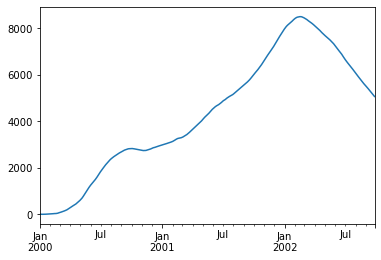

In [179]:
ts.plot()

In [180]:
#데이터프레임에서 plot() 메소드는 라벨이 존재하는 모든 열을 그릴 때 편리

In [181]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D']) 
df

,A,B,C,D
2000-01-01,1.702151,0.520320,0.535567,-0.475143
2000-01-02,1.112052,0.771646,0.735987,0.856393
2000-01-03,-0.675755,-0.612942,0.923420,0.080227
2000-01-04,-0.072426,-0.526975,0.614584,1.084292
2000-01-05,-0.581002,1.533465,-0.855372,-0.187760
...,...,...,...,...
2002-09-22,0.722697,-0.241228,-1.608482,-0.766440
2002-09-23,-2.272601,-0.642530,-1.451990,0.136129
2002-09-24,-2.429765,1.391698,-1.102135,0.019807
2002-09-25,0.065694,-1.605529,-1.865510,-1.686927


In [182]:
df = df.cumsum()
df

,A,B,C,D
2000-01-01,1.702151,0.520320,0.535567,-0.475143
2000-01-02,2.814203,1.291965,1.271553,0.381251
2000-01-03,2.138448,0.679023,2.194974,0.461478
2000-01-04,2.066022,0.152048,2.809558,1.545769
2000-01-05,1.485020,1.685513,1.954186,1.358009
...,...,...,...,...
2002-09-22,2.126418,12.779065,32.710017,-47.571356
2002-09-23,-0.146182,12.136535,31.258027,-47.435226
2002-09-24,-2.575947,13.528233,30.155892,-47.415420
2002-09-25,-2.510253,11.922704,28.290382,-49.102347


<Figure size 432x288 with 0 Axes>

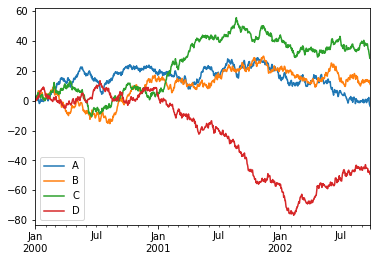

In [183]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In / Out (데이터 입 / 출력)

### CSV

[csv 파일에 쓰기, 파일 읽기](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

In [186]:
#csv 파일에 쓰기
df.to_csv('foo.csv')

In [185]:
#csv 파일 읽기
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.702151,0.520320,0.535567,-0.475143
1,2000-01-02,2.814203,1.291965,1.271553,0.381251
2,2000-01-03,2.138448,0.679023,2.194974,0.461478
3,2000-01-04,2.066022,0.152048,2.809558,1.545769
4,2000-01-05,1.485020,1.685513,1.954186,1.358009
...,...,...,...,...,...
995,2002-09-22,2.126418,12.779065,32.710017,-47.571356
996,2002-09-23,-0.146182,12.136535,31.258027,-47.435226
997,2002-09-24,-2.575947,13.528233,30.155892,-47.415420
998,2002-09-25,-2.510253,11.922704,28.290382,-49.102347


### HDF5

In [187]:
#HDF5 Store에 쓰기
df.to_hdf('foo.h5','df')

In [188]:
#HDF5 Store에서 읽기
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,1.702151,0.520320,0.535567,-0.475143
2000-01-02,2.814203,1.291965,1.271553,0.381251
2000-01-03,2.138448,0.679023,2.194974,0.461478
2000-01-04,2.066022,0.152048,2.809558,1.545769
2000-01-05,1.485020,1.685513,1.954186,1.358009
...,...,...,...,...
2002-09-22,2.126418,12.779065,32.710017,-47.571356
2002-09-23,-0.146182,12.136535,31.258027,-47.435226
2002-09-24,-2.575947,13.528233,30.155892,-47.415420
2002-09-25,-2.510253,11.922704,28.290382,-49.102347


### Excel

In [190]:
#엑셀 파일에 쓰기
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [191]:
#엑셀 파일 읽기
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.702151,0.520320,0.535567,-0.475143
1,2000-01-02,2.814203,1.291965,1.271553,0.381251
2,2000-01-03,2.138448,0.679023,2.194974,0.461478
3,2000-01-04,2.066022,0.152048,2.809558,1.545769
4,2000-01-05,1.485020,1.685513,1.954186,1.358009
...,...,...,...,...,...
995,2002-09-22,2.126418,12.779065,32.710017,-47.571356
996,2002-09-23,-0.146182,12.136535,31.258027,-47.435226
997,2002-09-24,-2.575947,13.528233,30.155892,-47.415420
998,2002-09-25,-2.510253,11.922704,28.290382,-49.102347


## Gotchas (잡았다!)

In [192]:
#연산 수행 시 다음과 같은 예외 상황을 볼 수도 있음
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [193]:
#이러한 경우에는 any(), all(), empty 등을 사용해서 무엇을 원하는지를 선택 (반영)해주어야 함
if pd.Series([False, True, False])is not None:
      print("I was not None")

I was not None


[(FAQ)참조](https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html)